Wait a minute... what if we use our big catalog of known EBs to pick:
# Known EBs already in TESS

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from astropy.table import Table
from scipy.optimize import curve_fit
from matplotlib.colors import LogNorm

from glob import glob

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
# matplotlib.rcParams.update({'font.family':'serif'})

# for the TESS Science Online 48hr sprint, we'll be using Cyberpunk for the graphics!
# https://github.com/dhaitz/mplcyberpunk
import mplcyberpunk
plt.style.use("cyberpunk")

In [3]:
knownEBs = pd.read_csv('BigCat.csv')

knownEBs.columns

Index(['Unnamed: 0', 'source_id', 'ra', 'dec', 'bp_rp', 'parallax',
       'phot_g_mean_mag', 'Per'],
      dtype='object')

In [4]:
# the TESS-Gaia xmatch from Trevor
gdir = '/Users/james/Dropbox/research_projects/TESS-Gaia/'
gfiles = glob(gdir+'*1arsec-result.csv')
gaia = pd.concat((pd.read_csv(f) for f in gfiles), ignore_index=True, sort=False)

gaia.columns

Index(['solution_id', 'designation', 'source_id', 'random_index', 'ref_epoch',
       'ra', 'ra_error', 'dec', 'dec_error', 'parallax',
       ...
       'tess_sector22_oid', 'tess_sector15_oid', 'tess_sector19_oid',
       'tess_sector23_oid', 'tess_sector14_oid', 'tess_sector10_oid',
       'tess_sector27_oid', 'tess_sector18_oid', 'tess_sector2_oid',
       'tess_sector6_oid'],
      dtype='object', length=138)

In [6]:
look = knownEBs.merge(gaia, right_on='source_id', left_on='source_id', how='inner')

In [10]:
look['ticid'].unique().size

320

In [11]:
look.shape

(771, 145)

In [18]:
EHow = pd.read_csv('EHow.csv')
Eok = ((EHow['parallax'] > 0) & 
       np.isfinite(EHow['bp_rp']) & 
       np.isfinite(EHow['phot_g_mean_mag']))


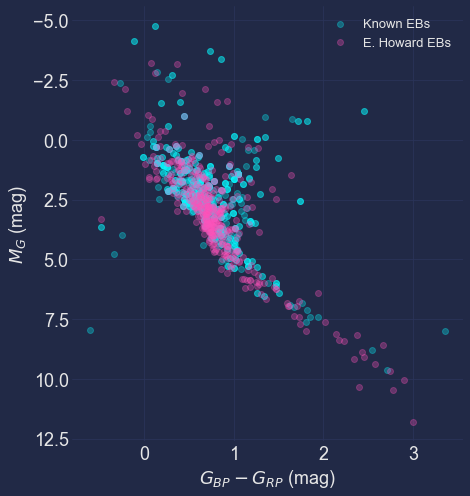

In [23]:
ok = ((look['parallax_x'] > 0) & 
       np.isfinite(look['bp_rp_x']) & 
       np.isfinite(look['phot_g_mean_mag_x']))

plt.figure(figsize=(7,8))
# plt.hist2d(look['bp_rp_x'][ok], 
#            look['phot_g_mean_mag_x'][ok] - 5. * np.log10(1000./look['parallax_x'][ok]) + 5,
#            norm=LogNorm(), cmap=plt.cm.cool, bins=100)
plt.scatter(look['bp_rp_x'][ok], 
           look['phot_g_mean_mag_x'][ok] - 5. * np.log10(1000./look['parallax_x'][ok]) + 5, 
            label='Known EBs', alpha=0.3)

plt.scatter(EHow['bp_rp'][Eok], 
            EHow['phot_g_mean_mag'][Eok] - 5. * np.log10(1000./EHow['parallax'][Eok]) + 5, 
            label='E. Howard EBs', alpha=0.3)

plt.legend(fontsize=13)
plt.gca().invert_yaxis()

plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.grid(True)



In [14]:
look.columns

Index(['Unnamed: 0', 'source_id', 'ra_x', 'dec_x', 'bp_rp_x', 'parallax_x',
       'phot_g_mean_mag_x', 'Per', 'solution_id', 'designation',
       ...
       'tess_sector22_oid', 'tess_sector15_oid', 'tess_sector19_oid',
       'tess_sector23_oid', 'tess_sector14_oid', 'tess_sector10_oid',
       'tess_sector27_oid', 'tess_sector18_oid', 'tess_sector2_oid',
       'tess_sector6_oid'],
      dtype='object', length=145)

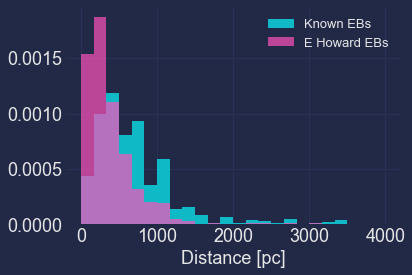

In [25]:
_ = plt.hist(1000./look['parallax_x'][ok], density=True, alpha=0.7, bins=np.linspace(0,4000,25), label='Known EBs')
_ = plt.hist(1000./EHow['parallax'][Eok], density=True, alpha=0.7, bins=np.linspace(0,4000,25), label='E Howard EBs')

plt.xlabel('Distance [pc]')
plt.legend(fontsize=13)